Notebook for evaluating Qiskit's transpilation.

Cambridge Consultants 2024\
Walden Killick

The purpose of this notebook is to benchmark the performance of Qiskit's transpiler -- specifically, to evaluate its transpilation of the multi-controlled NOT gates prevelant in block-encoding circuits.

In [1]:
from qiskit import transpile
from qiskit.circuit.library import MCMT
from qiskit.circuit.library.standard_gates import XGate
from matplotlib import pyplot as plt
import numpy as np
import scipy

In [2]:
def get_circuit_depth(num_ctrl_qubits: int) -> int:
    """Find the circuit depth of a transpiled multi-controlled NOT gate.

    Parameters
    ----------
    num_ctrl_qubits : int
        Number of control qubits.

    Returns
    -------
    int
        Circuit depth of the multi-controlled NOT gates when transpiled down to a native
        gate set.
    """
    circuit = MCMT(XGate(), num_ctrl_qubits, 1)
    circuit = transpile(circuit, basis_gates=['rz', 'sx', 'x', 'cx'])
    return circuit.depth()

In [3]:
x = range(1, 15)
y = [get_circuit_depth(t) for t in x]

In [4]:
# Exponential fit using scipy
popt, pcov = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(50, 0.1))
y_exp_fit = [popt[0]*np.exp(popt[1]*t) for t in x]

# Polynomial fit using numpy
degree = 2
coeffs = np.polyfit(x, y, degree)
coeffs = list(reversed(coeffs))
y_poly_fit = [sum([coeffs[d]*t**d for d in range(degree+1)]) for t in x]

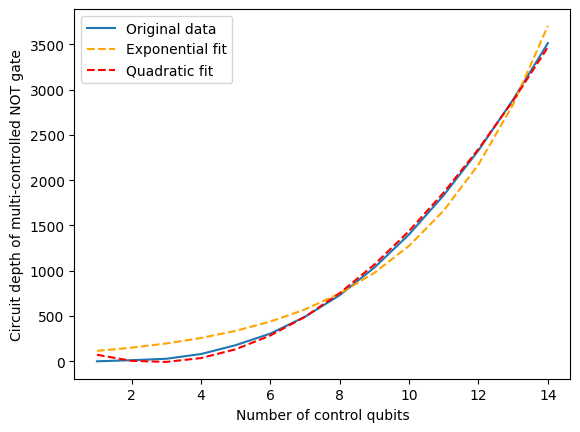

In [5]:
plt.plot(x, y, label='Original data')
plt.plot(x, y_exp_fit, '--', color='orange', label='Exponential fit')
plt.plot(x, y_poly_fit, '--', color='red', label='Polynomial fit')
plt.legend()
plt.xlabel('Number of control qubits')
plt.ylabel('Circuit depth of multi-controlled NOT gate')
plt.show()